In [56]:
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [57]:

def fetch_data_with_pagination(api_url, start_offset=0, row_limit=5000):
    all_rows = []
    while True:
        # Update the API URL with the current offset
        paginated_url = f"{api_url}&offset={start_offset}&length={row_limit}"
        response = requests.get(paginated_url)
        data = response.json()
        if 'response' in data and 'data' in data['response']:
            rows = data['response']['data']
            all_rows.extend(rows)

            # Break the loop if the number of rows returned is less than the row_limit
            if len(rows) < row_limit:
                break
            else:
                start_offset += row_limit
        else:
            break  # Break the loop if the expected data structure is not present

    return all_rows


base_url = 'https://api.eia.gov/v2/coal/shipments/plant-aggregates/data/?frequency=annual&data[0]=ash-content&data[1]=heat-content&data[2]=price&data[3]=quantity&data[4]=sulfur-content&start=2008&end=2022&sort[0][column]=period&sort[0][direction]=desc&api_key=HiERxZ9fQ1Lrp7k4SqeZiMFvUABbYucBDlqjOgZQ'


data_rows = fetch_data_with_pagination(base_url)

# Convert to DataFrame
df = pd.DataFrame(data_rows)

In [58]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,w,2008507,.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.85,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.9,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.63,3029643,.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,w,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.34,7957644,.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.23,12742961,.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,w,933486,.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,w,657652,.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [59]:
df.dtypes

period                   object
location                 object
plantStateDescription    object
plant                    object
plantName                object
rank                     object
coalRankDescription      object
ash-content              object
heat-content             object
price                    object
quantity                 object
sulfur-content           object
ash-content-units        object
heat-content-units       object
price-units              object
quantity-units           object
sulfur-content-units     object
dtype: object

In [60]:

columns_to_convert = ['ash-content', 'heat-content', "sulfur-content", "quantity"]  

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [61]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                     object
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [62]:
df.duplicated().sum()

1098

In [63]:
df.drop_duplicates(inplace=True)

In [64]:
df.isnull().sum()

period                    0
location                  0
plantStateDescription     0
plant                     0
plantName                 0
rank                      0
coalRankDescription       0
ash-content               0
heat-content              0
price                    11
quantity                  0
sulfur-content            0
ash-content-units         0
heat-content-units        0
price-units               0
quantity-units            0
sulfur-content-units      0
dtype: int64

In [65]:
import pandas as pd
import numpy as np


df['price'] = df['price'].replace('w', np.nan, regex=False)


df['price'] = pd.to_numeric(df['price'], errors='coerce')


print(df.head())


  period location      plantStateDescription  plant  \
0   2022       WY                    Wyoming    887   
1   2022      PAB  Pennsylvania (Bituminous)  56068   
2   2022      WVN   West Virginia (Northern)   8827   
3   2022       WY                    Wyoming   6641   
4   2022      WVN   West Virginia (Northern)   8226   

                             plantName rank coalRankDescription  ash-content  \
0                          Joppa Steam  SUB       Subbituminous         4.83   
1          Elm Road Generating Station  BIT          Bituminous         7.73   
2                         IMT Transfer  BIT          Bituminous         8.66   
3  Independence Steam Electric Station  TOT                 All         4.74   
4                 Cheswick Power Plant  BIT          Bituminous         9.62   

   heat-content  price  quantity  sulfur-content  ash-content-units  \
0          8890    NaN   2008507            0.22  percent by weight   
1         13011  65.85    547351            2.

In [66]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                    float64
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [67]:
df.isnull().sum()

period                      0
location                    0
plantStateDescription       0
plant                       0
plantName                   0
rank                        0
coalRankDescription         0
ash-content                 0
heat-content                0
price                    4867
quantity                    0
sulfur-content              0
ash-content-units           0
heat-content-units          0
price-units                 0
quantity-units              0
sulfur-content-units        0
dtype: int64

In [68]:
df['price'] = df['price'].interpolate()

In [69]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,NaN,2008507,0.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.850000,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.900000,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.630000,3029643,0.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,57.076667,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.340000,7957644,0.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.230000,12742961,0.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,31.230000,933486,0.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,31.230000,657652,0.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [70]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    1
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    0
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [73]:
selected_columns = ['period', 'location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription', 'ash-content',
                   'heat-content', 'price','quantity','sulfur-content']
new_df = df[selected_columns]

In [74]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.850000,547351,2.43
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.900000,1422382,2.97
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.630000,3029643,0.21
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,57.076667,114628,3.03
5,2022,OH,Ohio,8102,"Gavin Power, LLC",BIT,Bituminous,9.50,12530,70.523333,4596047,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.340000,7957644,0.56
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.230000,12742961,0.29
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,31.230000,933486,0.93
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,31.230000,657652,0.99


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_columns = ['location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription']

In [76]:
encoder = LabelEncoder()
for col in categorical_columns:
    new_df[col] = encoder.fit_transform(new_df[col])

C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_30828\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = encoder.fit_transform(new_df[col])
C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_30828\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = encoder.fit_transform(new_df[col])
C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_30828\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [77]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,7.73,13011,65.850000,547351,2.43
2,2022,27,27,492,263,1,2,8.66,11634,67.900000,1422382,2.97
3,2022,29,29,435,267,4,0,4.74,8921,43.630000,3029643,0.21
4,2022,27,27,479,97,1,2,9.62,12438,57.076667,114628,3.03
5,2022,17,17,474,213,1,2,9.50,12530,70.523333,4596047,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,10.05,10841,35.340000,7957644,0.56
19750,2008,29,29,359,283,4,0,5.02,8700,31.230000,12742961,0.29
19751,2008,8,8,40,86,4,0,12.81,11973,31.230000,933486,0.93
19752,2008,27,27,42,10,1,2,11.63,12409,31.230000,657652,0.99


In [78]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']


scaler = StandardScaler()


new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])



C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_30828\1969826805.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])


In [79]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,-0.283398,1.167776,0.350553,-0.740290,0.865455
2,2022,27,27,492,263,1,2,-0.098066,0.401863,0.437923,-0.314565,1.354050
3,2022,29,29,435,267,4,0,-0.879251,-1.107158,-0.596449,0.467409,-1.143216
4,2022,27,27,479,97,1,2,0.093245,0.849063,-0.023361,-0.950821,1.408339
5,2022,17,17,474,213,1,2,0.069331,0.900235,0.549728,1.229505,2.213617
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,0.178936,-0.039218,-0.949764,2.865008,-0.826533
19750,2008,29,29,359,283,4,0,-0.823452,-1.230082,-1.124929,5.193188,-1.070831
19751,2008,8,8,40,86,4,0,0.728955,0.590421,-1.124929,-0.552426,-0.491755
19752,2008,27,27,42,10,1,2,0.493802,0.832932,-1.124929,-0.686626,-0.437467


In [80]:
data_lr = new_df[['sulfur-content', 'heat-content']]

X = data_lr[['sulfur-content']]  # Independent variable
y = data_lr['heat-content']  # Dependent variable

In [81]:
data_lr

,sulfur-content,heat-content
1,0.865455,1.167776
2,1.354050,0.401863
3,-1.143216,-1.107158
4,1.408339,0.849063
5,2.213617,0.900235
...,...,...
19749,-0.826533,-0.039218
19750,-1.070831,-1.230082
19751,-0.491755,0.590421
19752,-0.437467,0.832932


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:

train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

In [84]:
train_data

,sulfur-content,heat-content
3949,-0.021256,0.365153
13859,-0.428419,0.886329
2446,1.046416,1.176675
8600,-0.518899,1.086568
9168,0.584965,0.870755
...,...,...
11745,-1.061783,-1.400285
12425,-0.410322,0.488633
5473,2.050752,0.988674
861,1.372147,0.678860


In [91]:
train_data.to_csv('train_dataLR.csv', index=False) 

In [85]:
test_data

,sulfur-content,heat-content
9952,-1.125120,-1.166117
13595,0.539725,1.194474
2147,-1.143216,-1.250662
13220,1.752165,0.550930
3847,1.001176,0.465828
...,...,...
436,0.720686,1.193362
17596,-1.088927,-1.338545
18124,-0.790341,-1.167229
10720,2.213617,0.816246


In [92]:
test_data.to_csv('test_dataLR.csv', index=False) 

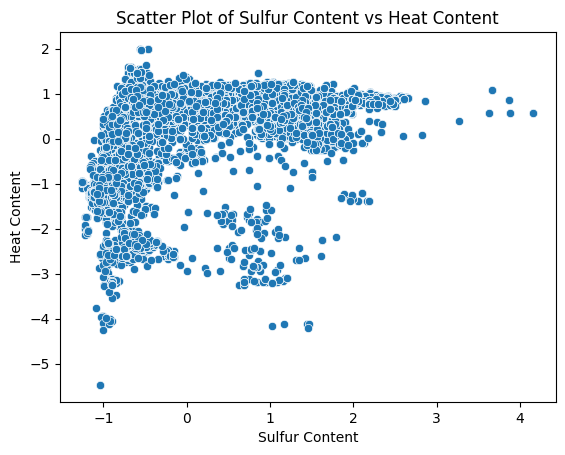

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='sulfur-content', y='heat-content', data=data_lr)
plt.title('Scatter Plot of Sulfur Content vs Heat Content')
plt.xlabel('Sulfur Content')
plt.ylabel('Heat Content')
plt.show()


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score', 'Explained Variance'],
    'Value': [mse, rmse, mae, r2, explained_variance]
})


print(metrics_df)


               Metric     Value
0                 MSE  0.721625
1                RMSE  0.849485
2                 MAE  0.689362
3            R² Score  0.294588
4  Explained Variance  0.295008


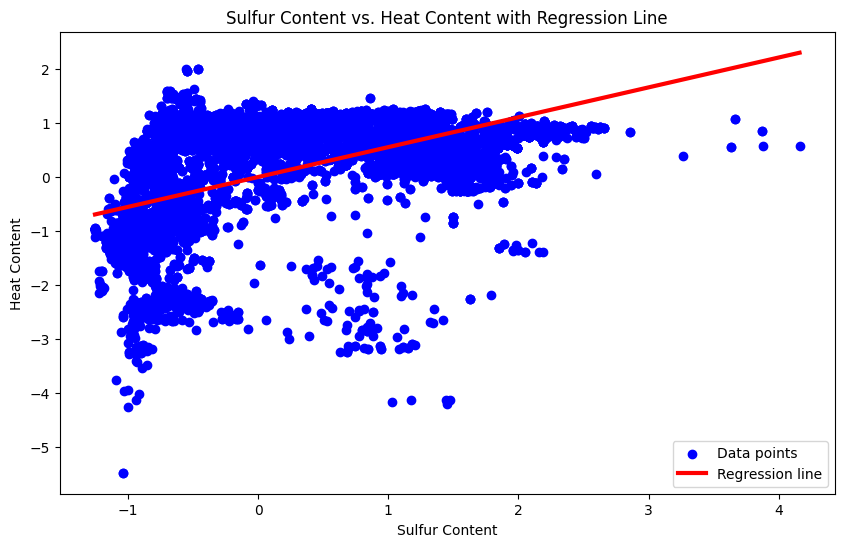

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
sulfur_content = X_train['sulfur-content'].values.reshape(-1, 1)  # independent
heat_content = y_train.values  # Dependent 


model = LinearRegression()
model.fit(sulfur_content, heat_content)


prediction_space = np.linspace(min(sulfur_content), max(sulfur_content)).reshape(-1, 1)
predictions = model.predict(prediction_space)


plt.figure(figsize=(10, 6))
plt.scatter(sulfur_content, heat_content, color='blue', label='Data points')
plt.plot(prediction_space, predictions, color='red', linewidth=3, label='Regression line')
plt.title('Sulfur Content vs. Heat Content with Regression Line')
plt.xlabel('Sulfur Content')
plt.ylabel('Heat Content')
plt.legend()
plt.show()
